# Visualizing 3+ features for clustering

**tldr**: Visualizing more than 2 features on a scatterplot becomes tricky. This notebook presents some guidance for doing so.

Prompted from a student question:

> can we create a visual chart for the times when we use more than 2 columns? it seems to produce weird scatter plots if more than 2 are listed in the ax.scatter(subset…) part.

My original answer:

---

Short answer no.

Longer answer yes, but it's more complicated; the third argument to `ax.scatter` isn't going to do what I think you are trying to do.

A scatter plot by definition only shows the relationship between 2 variables on the x and y axis.

It is totally possible to visualize more than 2 variables, but things get more complicated.

* One option is to add a z axis and to plot in 3 dimensions instead of 2. [Matplotlib totally lets you do this](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) and this is something that's kind of fun to play around with. Ultimately, however, IMHO, this isn't super effective. While they can be fun to create, 3d plots are very hard to read and make sense of.
* Another option are to vary properties of the 2d scatter plot like color, shape, or size. Seaborn has a bunch of ways to make this happen; try playing around with the `relplot` and using the third feature as the value for the `hue` or `size` keyword arguments (I think there's even more ways to do, you can read the docs to find more).
* Lastly we can just make multiple scatter plots of subsets of the features used in creating the clusters. This is probably the most common option in practice because if cluster with, for example, 6 different features, you can't really fit all of them on the same visualization.

For example, if I created clusters based on columns `x1`, `x2`, and `x3`, I could do something like:

```
# make the cluster column unambiguously a string so that seaborn doesn't read it
# as a number
df.cluster = 'cluster ' + df.cluster.astype(str)
sns.relplot(data=df, x='x1', y='x2', hue='cluster', size='x3')
```

And seaborn will create a scatter plot of `x1` vs `x2`, use color to indicate different clusters, and the size of the data points will indicate the magnitude of the `x3` value.

Alternatively, we could create multiple visuals to explore the multiple dimensions, e.g.

```
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', ax=ax1)
sns.scatterplot(data=df, x='x2', y='x3', hue='cluster', ax=ax2)
```

---

Below is a demonstration of the above answer:

---

First a little setup. You can skim through this part and just look at the dataframe we produce at the end of the cell.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# create some fake data to play with:
np.random.seed(123)
df = pd.DataFrame(dict(x1=np.random.randn(100)))
df['x2'] = df.x1 + np.random.randn(100)
df['x3'] = df.x1 + df.x2 + np.random.randn(100)

# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['x1', 'x2', 'x3']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

# cluster and add identified clusters back to our dataframe
X = train_scaled[['x1', 'x2', 'x3']]
kmeans = KMeans(n_clusters=4).fit(X)
train['cluster'] = kmeans.labels_
# make the cluster column unambiguously a string type
train.cluster = 'cluster ' + train.cluster.astype(str)
train.head()

,x1,x2,x3,cluster
39,0.283627,-0.070373,0.014142,cluster 0
59,1.069393,0.926217,4.954235,cluster 3
94,-0.335011,-0.137992,-2.396718,cluster 2
56,0.890706,1.444563,2.925973,cluster 3
27,-1.428681,-0.928941,-3.732309,cluster 2


Now we'll demonstrate several ways to visualize the results of our clustering. Basically we just want to visualize how the new `cluster` feature interacts with the other features.

First we could make multiple visualizations:

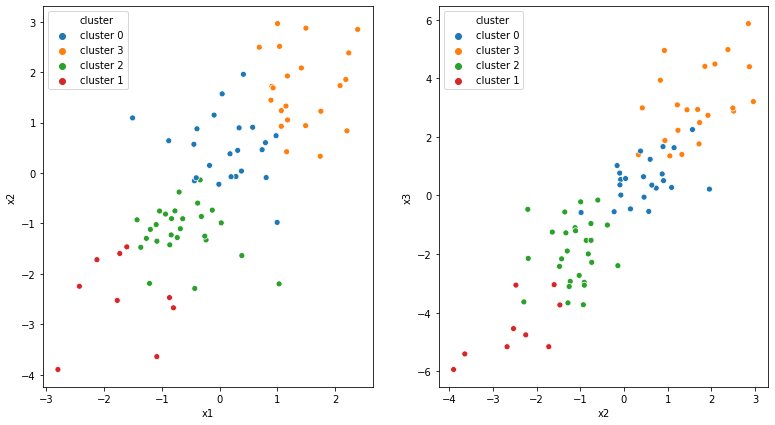

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))

sns.scatterplot(data=train, x='x1', y='x2', hue='cluster', ax=ax1)
sns.scatterplot(data=train, x='x2', y='x3', hue='cluster', ax=ax2)

Neither one of the scatter plots individually tells the whole story, but we can look at different "slices" of the data this way with multiple visuals.

Another option is to modify other aspects of the scatterplot to indicate a third feature:

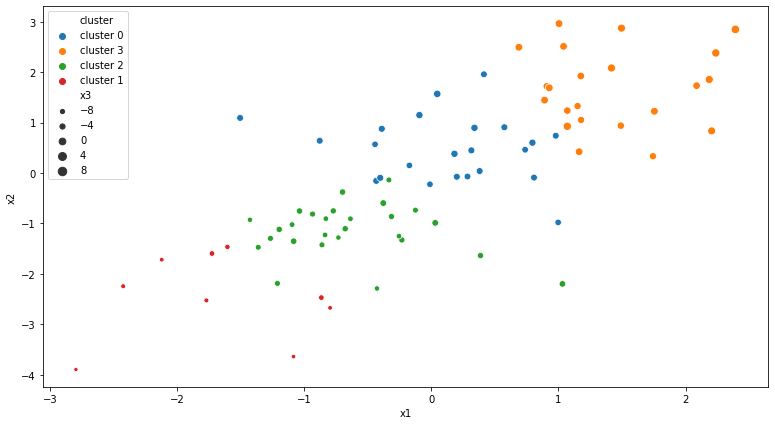

In [3]:
fig, ax = plt.subplots(figsize=(13, 7))

sns.scatterplot(data=train, x='x1', y='x2', hue='cluster', size='x3', ax=ax)

Here we have a scatterplot of x1 and x2. Color is used to indicate which cluster each point belongs to, and the size of the point corresponds to the value of x3.

Seaborn provides a number of other ways to do this sort of visualization trick:

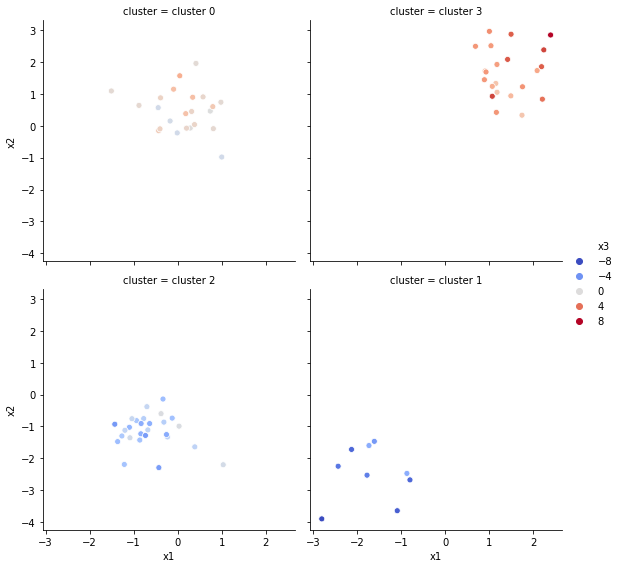

In [4]:
sns.relplot(data=train, x='x1', y='x2', hue='x3', palette='coolwarm', col='cluster', col_wrap=2, height=4)

We we have 4 scatterplots of x1 vs x2. Each subplot represents one cluster, and the color of each point corresponds to that points value for `x3`.

Another option is to do a pair plot and color by cluster to see all the combinations together.

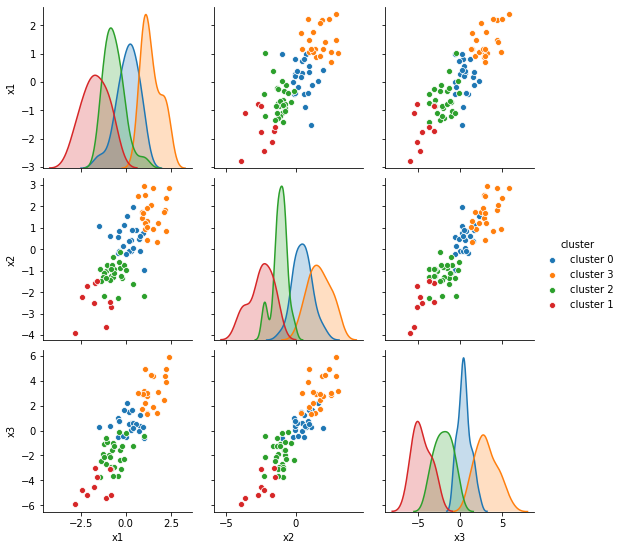

In [5]:
sns.pairplot(data=train, hue='cluster')

## Postscript

* If we were to build clusters based on more than 3 features, we could use combinations of the above approaches and take a look at multiple slices of the data at a time.
* Technically none of the techniques presented in the in this notebook are unique to clustering; they apply to anytime you have multiple continuous variables whose interaction with a categorical variable you want to visualize. It just so happens that the categorical variable in question here is the cluster.